In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('Avertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
x = sm.add_constant(data[['TV','Radio','Newspaper']])

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
y = data['Sales']

In [10]:
model_ols = sm.OLS(y,x).fit()

In [11]:
model_ols.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

#equation
Sales =4.625124 -0.054446 * Tv + 0.107001 * Radio + 0.000336 * Newspaper

In [14]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 03 May 2021   Prob (F-statistic):           8.13e-99
Time:                        16:06:07   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
data[['TV', 'Radio','Newspaper']].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


In [16]:
import seaborn as sns
Radio_resid = model_ols.resid

In [17]:
Radio_resid

0      0.879028
1     -0.868248
2      1.503791
3     -0.812447
4      2.255863
5     -3.156337
6      0.526715
7     -0.070625
8     -0.518396
9     -0.188710
10     3.747280
11    -1.484005
12    -0.498797
13     2.950786
14    -0.273289
15     2.014456
16     0.228942
17     0.197855
18     0.707560
19    -0.608728
20    -1.497941
21    -0.604147
22    -1.461777
23     1.627789
24     0.328546
25    -2.319969
26    -0.544791
27     1.407837
28    -2.178654
29     0.305289
         ...   
170   -0.194803
171    1.666309
172   -0.248692
173    2.142201
174   -0.602067
175    2.052449
176   -1.187707
177    1.961779
178   -3.144329
179    2.882735
180    2.067678
181    0.091469
182    0.395147
183    1.291116
184   -3.132659
185    1.981157
186   -2.153942
187   -0.806757
188   -0.785176
189   -0.245829
190   -0.375430
191    2.006592
192   -0.110903
193    1.398060
194    0.713085
195    0.494510
196    3.719059
197   -0.459287
198    0.917780
199    0.214880
Length: 200, dtype: floa

Text(0.5, 1.0, 'PP plot to check for the normality of errors')

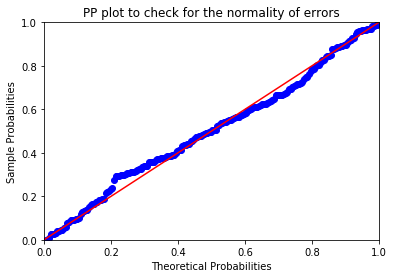

In [18]:
probplot = sm.ProbPlot(Radio_resid, fit = True)
probplot.ppplot(line = '45')
plt.title('PP plot to check for the normality of errors')

In [21]:
def get_standardized_erros(vals):
    return(vals - vals.mean())/ vals.std()
    

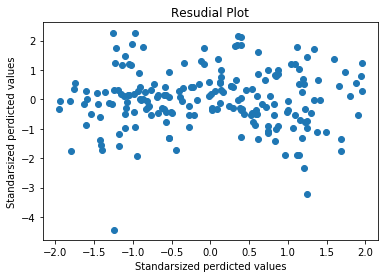

In [22]:
plt.scatter(get_standardized_erros(model_ols.fittedvalues), get_standardized_erros(Radio_resid))
plt.xlabel('Standarsized perdicted values')
plt.ylabel('Standarsized perdicted values')
plt.title('Resudial Plot');